# Linear Regression

Linear regression is one of the most interpretable machine learning models. As suggested by its name, it is linear and simple. Yet, it may not give accurate predictions when data is complex. 


## How Linear Regression Works
- Linear regression is a model that assumes a linear relationship between X and y. Mathematically speaking, it can be expressed as: 
$$y = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + ... + \theta_d \cdot x_d$$
- That is to draw a best fit line between the datapoints. 
- It is "best fit" when it minimizes the mean squared error (MSE), or it is also known as the residual sum of squares (RSS).
- A residual is the difference between the truth value $y_i$ and the predicted value $\hat{y_i}$: $e_i = y_i - \hat{y_i}$
- To minimize RSS is to minimize $e_1^2 + e_2^2 + e_3^2 + ... + e_n^2$
- In practice, Ordinary Least Squares (OLS) is used to find the model parameters. 

## Using Linear Regression in Scikit-learn

Now, download the Vehicle Dataset from Kaggle https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
and save in folder 'car_dataset'

We can open the 'car data.csv' with the Pandas package:

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("car_dataset/car data.csv")
print("shape of the dataset:", df.shape)  # check the dataset shape
df.head()  # check the first few columns

shape of the dataset: (301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Our goal is to predict the Selling_Price. Intuitively speaking, the higher the present price, the higher the selling price. 

Text(0, 0.5, 'Selling_Price')

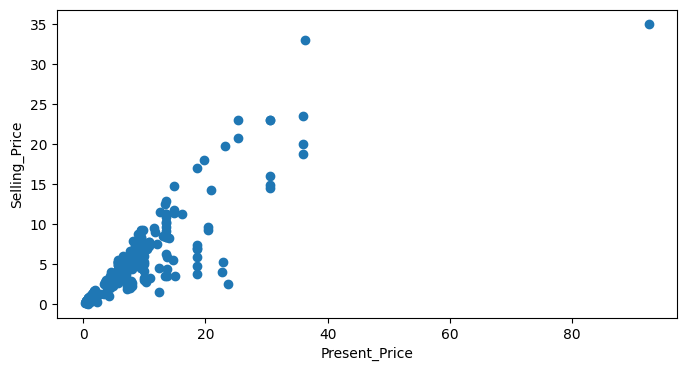

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

plt.scatter(df.loc[:,['Present_Price']], df['Selling_Price'])
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')

We can fit a linear line with this, however, we can obviously see the variance increases when present price increase. This is heteroscedasticity, violating one of the assumptions of Ordinary Least Square (OLS). 

array([[<Axes: title={'center': 'Present_Price'}>]], dtype=object)

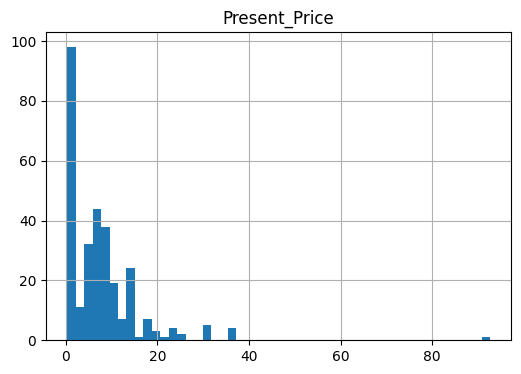

In [4]:
# Plot the distribution of present price
df.hist(column=['Present_Price'],bins=50, figsize=(6,4))

Looking at the distribution of present price, we can see it is very skewed. A common technique in feature engineering is to take the log of the price. It works as price is never negative.

array([[<Axes: title={'center': 'Present_Price_log'}>]], dtype=object)

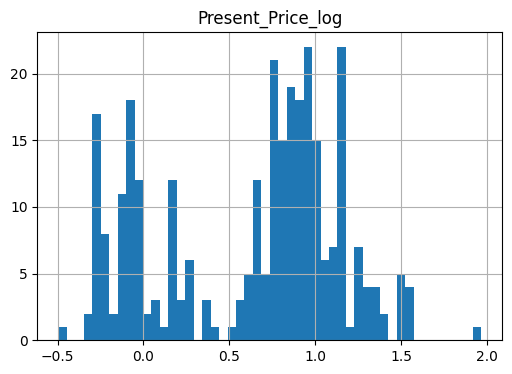

In [5]:
# Take the log of the price
df['Present_Price_log'] = np.log10(df['Present_Price'])

# Plot the log distribution again
df.hist(column=['Present_Price_log'],bins=50, figsize=(6,4))

Now, the distribution resembles a Gaussian distribution a bit better.

In [7]:
# Similarly, apply log transformation on other features and selling price
df['Kms_Driven_log'] = np.log10(df['Kms_Driven'])
df['Selling_Price_log'] = np.log10(df['Selling_Price'])

Text(0, 0.5, 'Selling_Price_log')

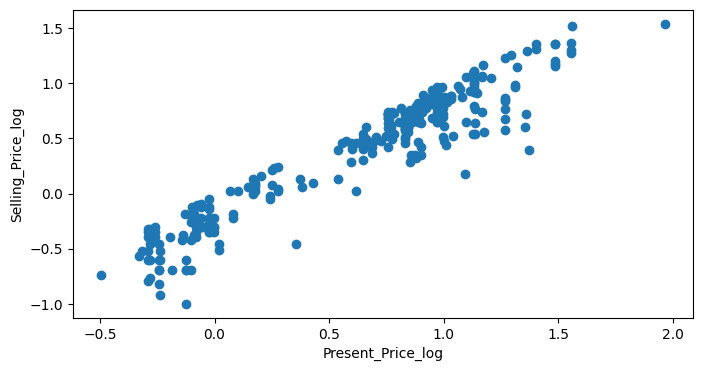

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

plt.scatter(df.loc[:,['Present_Price_log']], df['Selling_Price_log'])
plt.xlabel('Present_Price_log')
plt.ylabel('Selling_Price_log')

Now, we can see a clearer linear relationship between the log present price and log selling price.

In [6]:
# Create feature 'years used'
this_year = 2024
df['years_used'] = this_year - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Price_log,years_used
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0.747412,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0.979548,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0.993436,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0.618048,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0.836957,10


In [8]:
# Split training and test data
from sklearn.model_selection import train_test_split

X = df[['Present_Price_log', 'Kms_Driven_log', 'years_used']]
y = df['Selling_Price_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [9]:
# Fit a linear regression model
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [10]:
# R-squared
reg.score(X_test, y_test)

0.9724065782801874

In [11]:
# Coefficient
reg.coef_

array([ 0.99983379, -0.04181662, -0.04829241])

In [12]:
# Intercept
reg.intercept_

0.461233277048039

## Interpreting the coefficients
The coefficients are important for interpreting a linear model. We can see the log present price contributes most to the model prediction. A unit increase in log present price would contribute 0.9998 more to the log selling price, holding other factors constant. The negative coefficient of the features log Kms driven and number of years used suggest a negative relationship with the selling price. Indeed, the price should be higher if the car is used less.  